<a href="https://colab.research.google.com/github/pbeens/OTF-Data-Analysis-2021-05/blob/main/Demo_Teacher_Years_vs_Grade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Teacher Years of Service vs Grade

---



This demo is being used to show how to use the basic data analysis template available at https://github.com/pbeens/OTF-Data-Analysis-2021-05/blob/main/Data_Analysis_Template.ipynb.

The data is from a Google Form which goes into a Google Sheet. The sheet has been made public so it is available to import. The original URL of the sheet is https://docs.google.com/spreadsheets/d/1iPuWBPF4vfo-LYydHyASKsJcQZSyd-egfwbt7kNE6r8/edit?resourcekey#gid=2065641993

# What is the Objective?

- To review the entered data for any correlations between grade taught and # of years of service.

# Get the Data

- You need to import the Pandas library.
- You need to define the URL of the source file or create the data within this notebook. There are two sections here for that. Delete the one you don't use.
- You need to create the dataframe.
- You may want to include some additional notes here about the data.

In [1]:
import pandas as pd

## From a Website

In [21]:
# Enter the URL here
url = 'https://docs.google.com/spreadsheets/d/1iPuWBPF4vfo-LYydHyASKsJcQZSyd-egfwbt7kNE6r8/export?format=csv'

# From a Google Sheet
# Note: You must change the last part of the URL to /export?format=csv
# Note 2: The Google Sheet must be public! 
df = pd.read_csv(url)

# Quick look at the data...
df.sample(n=5) # or frac=0.2 

,Timestamp,How many years have you been teaching,What grade do you teach the most?,What subject do you teach the most?
6,5/3/2021 18:58:39,21,12,Mathematics (9-12)
4,5/3/2021 18:14:32,29,11,Technological Education
2,5/3/2021 18:11:56,25,9,Science (9-12)
0,5/3/2021 17:42:48,26,12,Technological Education
9,5/3/2021 21:13:32,20,11,Social Sciences and Humanities


# Quick Look at the Data

Common techniques are to look at the first few rows (`head()`), the column names (`columns`), and the data types (`dtypes`). A statistical summary (`describe()`) is sometimes useful, especially if the data is numeric.

In [3]:
# The first few records

df.head()

,Timestamp,How many years have you been teaching,What grade do you teach the most?,What subject do you teach the most?
0,5/3/2021 17:42:48,26,12,Technological Education
1,5/3/2021 17:56:54,15,11,Technological Education
2,5/3/2021 18:11:56,25,9,Science (9-12)
3,5/3/2021 18:13:24,15,11,Computer Studies
4,5/3/2021 18:14:32,29,11,Technological Education


In [4]:
# The names of the columns

df.columns

Index(['Timestamp', 'How many years have you been teaching',
       'What grade do you teach the most?',
       'What subject do you teach the most?'],
      dtype='object')

In [5]:
# The datatypes

df.dtypes

Timestamp                                object
How many years have you been teaching     int64
What grade do you teach the most?         int64
What subject do you teach the most?      object
dtype: object

In [6]:
# A statistical summary

df.describe()

,How many years have you been teaching,What grade do you teach the most?
count,10.000000,10.000000
mean,21.100000,11.200000
std,5.195083,0.918937
min,14.000000,9.000000
25%,16.250000,11.000000
50%,21.000000,11.000000
75%,25.000000,12.000000
max,29.000000,12.000000


# Clean/Fix the Data

This will depend on the data we're looking at. Some issues may be:

- extraneous text in the data
- incorrect data type
- invalid (or no) data
- we need to add columns

Use this [notebook](https://github.com/pbeens/OTF-Data-Analysis-2021-05/blob/main/Demo_Fixing_Data.ipynb) for hints on how to clean or fix the data. It is recommended to open the notebook in Colab so you can see the table of contents, which will make it much easier to use.

In [7]:
# Code goes here

df.rename(columns={'How many years have you been teaching': 'Num_Years',
                   'What grade do you teach the most?': 'Grade',
                   'What subject do you teach the most?': 'Subject'}, inplace=True)
df.columns



Index(['Timestamp', 'Num_Years', 'Grade', 'Subject'], dtype='object')

# Filter the Data

You might want a subset of the data. This video is a great intro for how to do this: [https://www.youtube.com/watch?v=Lw2rlcxScZY](https://www.youtube.com/watch?v=Lw2rlcxScZY)

If you don't need to filter the data then delete these rows. 

In [8]:
# create the filter
high_school_filter = (df['Grade'] >= 9) 
elem_filter = (df['Grade'] < 9)


# apply the filter & create new dataframes
sec_df = df.loc[high_school_filter]
elem_df = df.loc[elem_filter] 

# check that it worked
elem_df

,Timestamp,Num_Years,Grade,Subject


# Plot the Data

Kinds of plots:

- ‘bar’ or ‘barh’ for bar plots
- ‘hist’ for histogram
- ‘box’ for boxplot
- ‘kde’ or ‘density’ for density plots
- ‘area’ for area plots
- ‘scatter’ for scatter plots
- ‘hexbin’ for hexagonal bin plots
- ‘pie’ for pie plots

The following code is a good starting point to modify:

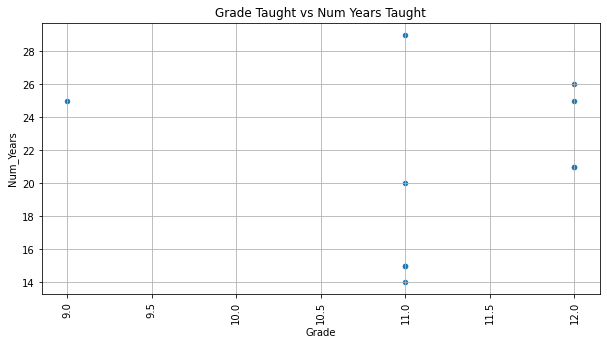

In [9]:
# Plot the data. Be sure to edit all the options!

plot = sec_df.plot(kind='scatter',
                      x='Grade',
                      y='Num_Years',  # if plotting more than one column, use a list
                      rot=90,  # to rotate labels
                      figsize=(10, 5),  # in inches
                      style='-.',  # styles are '-', '--', '-.', ':'
                      grid=True,  # grid on
                      legend=False,  # legend off 
                      xlabel='Grade',
                      ylabel='Num_Years',
                      title='Grade Taught vs Num Years Taught')

In [10]:
# Want to save the plot?

fig = plot.get_figure()
fig.savefig("output.png")

In [11]:
# An alternative method for plotting which allows curve fitting is to use 
# the plotly library. See https://plotly.com/python/plotly-express/ for more details.

import plotly.express as px

fig = px.scatter(sec_df, 
                 x="Grade", 
                 y="Num_Years",
                 title='Num_Years vs Grade',
                 trendline="ols") # ols = Ordinary Least Squares
fig.update_layout(xaxis = dict(tickmode = 'linear',        
                               tick0 = 9,        
                               dtick = 1))
fig.show()

# save the plot as output2.png
fig = plot.get_figure()
fig.savefig("output2.png")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



<br>

---
Note: The original of this template can be found on Google Colab at [bit.ly/beensdatatemplate](https://bit.ly/beensdatatemplate).
